# Linear Model Selection and Regularization – Labs



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 


from IPython.display import display, HTML
from sklearn import linear_model


In [11]:
# Load data

hitters_pd = pd.read_csv('Hitters.csv')
hitters_pd.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [12]:
hitters_pd.shape

(322, 20)

In [13]:
# Drop 59 rows missing data
hitters_pd = hitters_pd.dropna()
assert hitters_pd.isna().sum().sum() == 0

# Create dummy variables for qualitative features
qual = ['League', 'Division', 'NewLeague']
hitters_pd = pd.get_dummies(hitters_pd, columns=qual)

hitters_pd.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0


In [14]:
hitters_pd.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [15]:
X = hitters_pd.drop('Salary', axis=1)
y = hitters_pd['Salary']


In [16]:

### Define MSE
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

## The Lasso



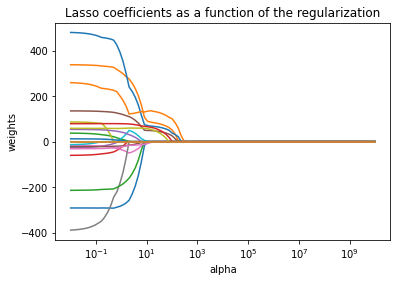

In [17]:
lamb = 10**np.linspace(10,-2,100)*0.5


lasso = linear_model.Lasso(max_iter=10000)
coefs = []

for a in lamb*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(lamb*2, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [18]:
### Demostration split 
np.array_split(X, 10)[1]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
33,583,168,17,83,80,56,5,1646,452,44,...,136,109,292,25,1,0,1,0,1,0
34,204,49,6,23,25,12,7,1309,308,27,...,66,419,46,5,1,0,0,1,1,0
35,379,106,10,38,60,30,14,6207,1906,146,...,571,72,170,24,0,1,0,1,0,1
37,268,60,5,24,25,15,2,350,78,5,...,18,442,59,6,0,1,0,1,0,1
40,181,41,1,15,21,33,2,232,50,4,...,45,326,29,5,1,0,1,0,1,0
43,217,46,7,32,19,9,4,694,160,32,...,32,307,25,1,1,0,1,0,1,0
45,254,68,2,28,26,22,6,999,236,21,...,118,359,30,4,1,0,1,0,1,0
46,416,132,7,57,49,33,3,932,273,24,...,80,73,177,18,0,1,0,1,0,1
47,205,57,8,34,32,9,5,756,192,32,...,51,58,4,4,1,0,1,0,1,0
49,526,146,13,71,70,84,6,2648,715,77,...,289,303,9,9,0,1,0,1,0,1


### The Lasso with Cross-Validation

In [19]:
def lasso_cv(X, y, λ, k):
    """Perform the lasso with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion if folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model = linear_model.Lasso(alpha=λ, copy_X=True, fit_intercept=False, max_iter=10000,
                                   normalize=False, positive=False, precompute=False, random_state=None,
                                   selection='cyclic', tol=0.0001, warm_start=False).fit(X_train, y_train)
        
        
        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

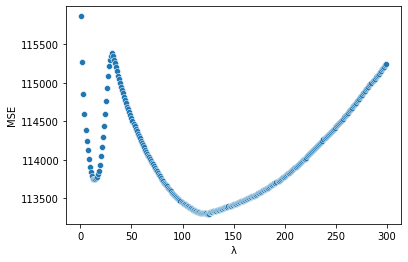

In [20]:


lambdas = np.arange(1, 300, 1)
MSEs    = [] 
for l in lambdas:
    MSEs += [np.mean(lasso_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': lambdas, 'MSE': MSEs}));

In [21]:
min(zip(MSEs, lambdas))

(113299.4260108856, 126)

We used 10-fold cross-validation to find the optimal lambda value for the lasso. The lowest MSE score achieved is 113,299 when λ=126.


(array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

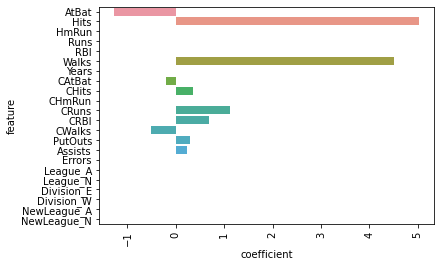

In [22]:
# What coefficients does the lasso choose for the optimal lambda value?
model = linear_model.Lasso(alpha=126, copy_X=True, fit_intercept=False, max_iter=10000,
                           normalize=False, positive=False, precompute=False, random_state=None,
                           selection='cyclic', tol=0.0001, warm_start=False).fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)

In [27]:
display(HTML('<h4>Model chosen by lasso:</h4>'))
print('Salary ~ {}'.format(' + '.join(X.columns[model.coef_ != 0])))
print('MSE: {:01.0f}'.format(min(MSEs)))

Salary ~ AtBat + Hits + Walks + CAtBat + CHits + CRuns + CRBI + CWalks + PutOuts + Assists
MSE: 113299


### Built-in LassoCV function

In [28]:
# Exercise: Define X_train and Y_train, X_test, y_tes
y_train= y
X_train= X
#X_test=
#y_test=
lassocv = linear_model.LassoCV(alphas=lambdas, cv=10, max_iter=10000, normalize=False)
lassocv.fit(X_train, y_train.values.ravel())

LassoCV(alphas=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        preco

In [29]:
lassocv.alpha_

117

In [30]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
#mean_squared_error(y_test, lasso.predict(scale(X_test)))

Lasso(alpha=117, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 11 Text major ticklabel objects>)

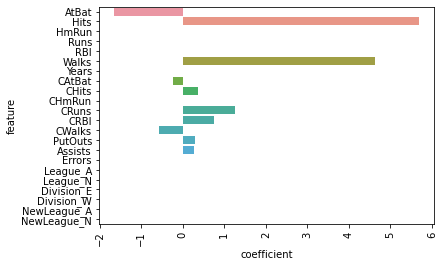

In [31]:
# Some of the coefficients are now reduced to exactly zero.
df = pd.DataFrame({'feature': X.columns, 'coefficient': lasso.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)

Lasso completeley ignored the dummy variables.

In [32]:
display(HTML('<h4>Model chosen by lasso:</h4>'))
print('Salary ~ {}'.format(' + '.join(X.columns[lasso.coef_ != 0])))
print('MSE: {:01.0f}'.format(min(MSEs)))

Salary ~ AtBat + Hits + Walks + CAtBat + CHits + CRuns + CRBI + CWalks + PutOuts + Assists
MSE: 113299
